<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - Take Home



---
#### Guidelines 
- This is your notebook for your take home midterm. 
- This part of your midterm, as you might expect, is **more challenging** so I highly recommend you to work ASAP. 

- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, cause your answers will be considered invalid = **0%**).
- The take home is **15%** of your total midterm score.
- You can work in groups of no more than **3** students.
- Your code **should not be the same** as the rest of your classmates we will check (trust me on this!!), if your code is the same as any of your classmate **your grade will be penalized.**
- The take home is due on **March 20** before class/exam (if you are taking the in-class exam before the rest of the class, you **need** to push your take home part before you commence with the in-class exam) = **NO EXCUSES !!**
- Use this [link][1] to **submit/include** the GitHub link to your take home exam.
[1]: https://docs.google.com/forms/d/e/1FAIpQLSfLkZJY80tw303ss8Ga_2sUMVgumAppWb4tYwssGTbr879_Mw/viewform "link"
- If you find a piece of code online (from someone else), and you decide to use in your midterm, you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
- Finally, you don't need to 
---

#### The data

The state of Iowa provides many data sets on their website, we will be using a dataset which contains transactions for all stores that have a class E liquor license. 

The data , data dictionary can be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy).

**However,** since many of you may have had computer issues reading medium size datasets, **everyone** needs to use the 10% dataset version of Iowa liquor sales, located in your dataset folder. 

---

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

# Throughout this take home, I have been combining some code from lectures and my project 1

## 1. Load the data from file

---

In [2]:
iowa_data =pd.read_csv('/home/dsi-student/Desktop/ECON628-01-dsalicath/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv')
# Uploading dataset

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [3]:
iowa_data.head(3)
# Looking over the first 3 rows

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34


In [4]:
iowa_data.describe().T

# Describing the data

,count,mean,std,min,25%,50%,75%,max
Store Number,270955.0,3.590264e+03,947.662050,2106.00,2604.0,3722.00,4378.00,9023.00
County Number,269878.0,5.723164e+01,27.341205,1.00,31.0,62.00,77.00,99.00
Category,270887.0,1.043888e+06,50182.111075,1011100.00,1012200.0,1031200.00,1062310.00,1701100.00
Vendor Number,270955.0,2.564344e+02,141.014890,10.00,115.0,260.00,380.00,978.00
Item Number,270955.0,4.597496e+04,52757.043086,168.00,26827.0,38176.00,64573.00,995507.00
Bottle Volume (ml),270955.0,9.248303e+02,493.088489,50.00,750.0,750.00,1000.00,6000.00
Bottles Sold,270955.0,9.871285e+00,24.040912,1.00,2.0,6.00,12.00,2508.00
Volume Sold (Liters),270955.0,8.981351e+00,28.913690,0.10,1.5,5.25,10.50,2508.00
Volume Sold (Gallons),270955.0,2.372830e+00,7.638182,0.03,0.4,1.39,2.77,662.54


In [5]:
iowa_data.info()

# Getting info on datatype for spotting potential issues

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [6]:
iowa_data.corr()

# Correlation between variables

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
Store Number,1.000000,0.007510,-0.012111,-0.004533,-0.026386,-0.063475,0.014422,-0.017696,-0.017686
County Number,0.007510,1.000000,-0.006336,0.001746,0.006810,-0.027694,0.018945,0.010199,0.010208
Category,-0.012111,-0.006336,1.000000,0.091920,0.116385,-0.009294,-0.000208,-0.004375,-0.004367
Vendor Number,-0.004533,0.001746,0.091920,1.000000,0.136120,0.024561,-0.002116,-0.007432,-0.007428
Item Number,-0.026386,0.006810,0.116385,0.136120,1.000000,-0.057282,-0.004766,-0.009555,-0.009545
Bottle Volume (ml),-0.063475,-0.027694,-0.009294,0.024561,-0.057282,1.000000,-0.012476,0.156258,0.156090
Bottles Sold,0.014422,0.018945,-0.000208,-0.002116,-0.004766,-0.012476,1.000000,0.883348,0.883378
Volume Sold (Liters),-0.017696,0.010199,-0.004375,-0.007432,-0.009555,0.156258,0.883348,1.000000,1.000000
Volume Sold (Gallons),-0.017686,0.010208,-0.004367,-0.007428,-0.009545,0.156090,0.883378,1.000000,1.000000



## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [7]:
iowa_data.rename(columns={
        'County Number':'county_number',
        'Category Name':'category_name',
        'Store Number':'store_number',
        'Zip Code ':'zip_code',
        'Vendor Number':'vebdor_number',
        'Item Number':'item_number',
        'Item Description':'item_description',
        'Bottle Volume (ml)':'bottle_volume_ml',
        'State Bottle Cost':'state_bottle_cost',
        'State Bottle Retail':'state_bottle_retail',
        'Bottles Sold':'bottles_sold',
        'Sale (Dollars)':'sale_dollars',
        'Volume Sold (Liters)':'volume_sold_liters',
        'Volume Sold (Gallons)':'volume_sold_gallons',
    }, inplace=True)

# Renaming variables 

In [8]:
print iowa_data.isnull().sum()

# Do we have problems with missing values?
# Yes, but we can't replace them with the mean due to the nature of the variables 
# Categories can be fixed with broader categories (see later exercise)
# Counties can potentially be looked up using zip-codes and getting access to a dataset that links the two

Date                      0
store_number              0
City                      0
Zip Code                  0
county_number          1077
County                 1077
Category                 68
category_name           632
vebdor_number             0
item_number               0
item_description          0
bottle_volume_ml          0
state_bottle_cost         0
state_bottle_retail       0
bottles_sold              0
sale_dollars              0
volume_sold_liters        0
volume_sold_gallons       0
dtype: int64


### 3.2 Clean the columns

In [9]:
iowa_data['state_bottle_cost'] = iowa_data['state_bottle_cost'].str.replace('$', '')
iowa_data['state_bottle_retail'] = iowa_data['state_bottle_retail'].str.replace('$', '')
iowa_data['sale_dollars'] = iowa_data['sale_dollars'].str.replace('$', '')

# Removing the dollar sign making some of the numbers being read as text
# http://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python

In [10]:
col=['sale_dollars','state_bottle_retail','state_bottle_cost']
for i in col:
    iowa_data[i]=iowa_data[i].str.replace('$', '').astype(float)
iowa_data[['sale_dollars','state_bottle_retail','state_bottle_cost']].describe().T

# This are variables we can now describe

,count,mean,std,min,25%,50%,75%,max
sale_dollars,270955.0,128.902375,383.027369,1.34,30.45,70.56,135.00,36392.4
state_bottle_retail,270955.0,14.675760,10.570145,1.34,8.27,12.27,17.88,637.5
state_bottle_cost,270955.0,9.773281,7.047119,0.89,5.50,8.00,11.92,425.0



### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life when dealing with data. This isn't a kind of programming where things are just right or wrong.

In [11]:
# We have redundent variables:
iowa_data.drop(['volume_sold_liters',
          ], axis=1, inplace=True) 

# I don't need gallons and liters, so I choose to drop liters (can change this later if necessary)
# I keep the rest in case they will be usefull for later exercises

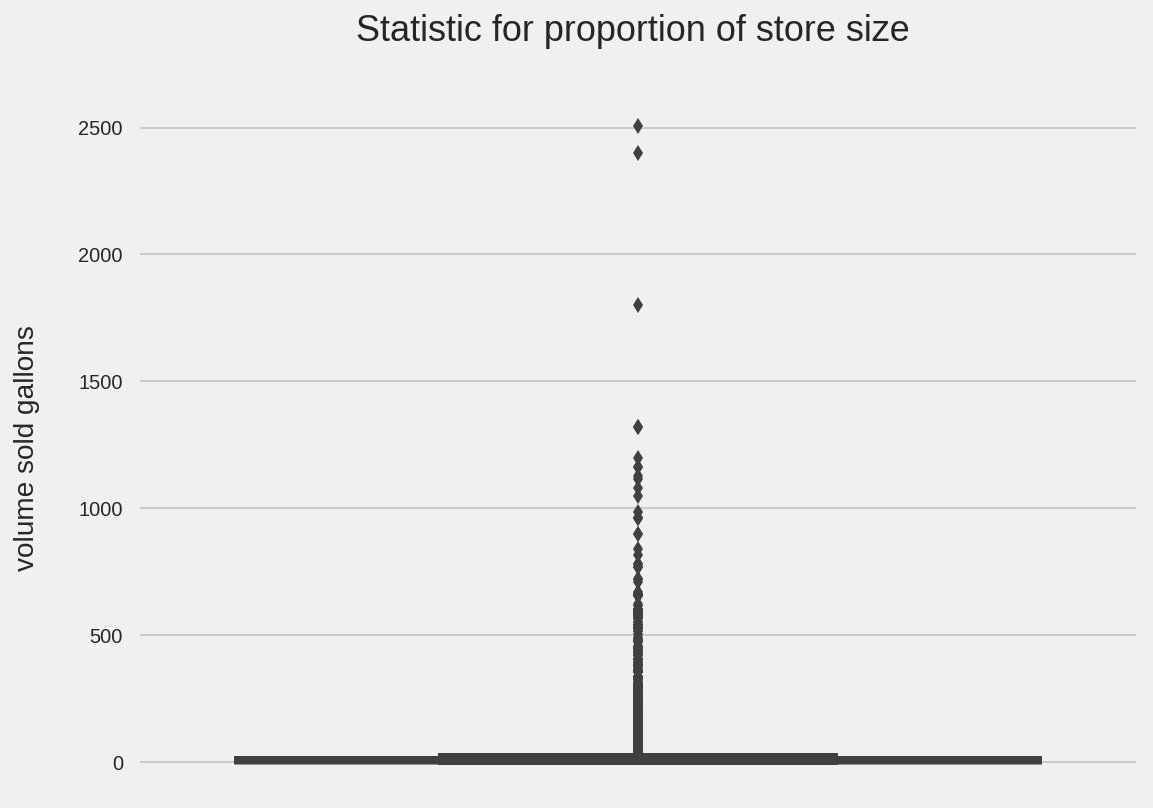

In [12]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(iowa_data.bottles_sold, orient='v',
            fliersize=6, linewidth=3, notch=True, 
            saturation=0.8, ax=ax)

ax.set_ylabel('volume sold gallons \n', fontsize=14)
ax.set_title('Statistic for proportion of store size \n', fontsize=18)

plt.show()

# As suspected, there are clearly outliers in sore sizes in Iowa
# I choose to keep these outliers for now, but would drop them if I were to run regressions
# I want the information on the largest stores included
# More extensive cleaning will be done in the later sections


## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [13]:
iowa_data['Date'] = pd.to_datetime(iowa_data['Date'])
iowa_data['year'], iowa_data['month'] = iowa_data['Date'].dt.year, iowa_data['Date'].dt.month
iowa_data['quarter'] = iowa_data['Date'].dt.quarter
iowa_data.head(5)

# Using pandas to create coulumns for years, months and quarters
# This will help me to look at which stores are close/open over different quarters
# http://stackoverflow.com/questions/30405413/python-pandas-extract-year-from-datetime-dfyear-dfdate-year-is-not

,Date,store_number,City,Zip Code,county_number,County,Category,category_name,vebdor_number,item_number,item_description,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_gallons,year,month,quarter
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,2.38,2015,11,4
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,0.40,2016,3,1
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,6.34,2016,2,1
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,2.77,2016,2,1
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,5.55,2015,8,3


In [14]:
iowa_data_groupedby_sales = iowa_data.groupby(['store_number','year', 'quarter'])['sale_dollars'].agg(np.sum).reset_index()
iowa_data_groupedby_sales.rename(columns = {'sale_dollars': 'sales_dollars_quartely'}, inplace=True)
iowa_data_groupedby_sales.head(15)

# Using the groupby command to look at aggregate sales for different stores over different quarters 
# I have quartely sales for the different stores

,store_number,year,quarter,sales_dollars_quartely
0,2106,2015,1,39287.29
1,2106,2015,2,31173.46
2,2106,2015,3,38324.77
3,2106,2015,4,37540.70
4,2106,2016,1,30523.75
5,2113,2015,1,2833.25
6,2113,2015,2,1994.30
7,2113,2015,3,2113.56
8,2113,2015,4,2369.11
9,2113,2016,1,2065.90


In [15]:
iowa_data_merged_q= iowa_data.merge(iowa_data_groupedby_sales, on=['store_number', 'year','quarter'], how='left')
iowa_data_merged_q.head(5)

# I merged this to the original dataset and merged on store number, year and quarter

,Date,store_number,City,Zip Code,county_number,County,Category,category_name,vebdor_number,item_number,...,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_gallons,year,month,quarter,sales_dollars_quartely
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,750,4.50,6.75,12,81.00,2.38,2015,11,4,2815.31
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,750,13.75,20.63,2,41.26,0.40,2016,3,1,39097.17
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,1000,12.59,18.89,24,453.36,6.34,2016,2,1,30523.75
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,1750,9.50,14.25,6,85.50,2.77,2016,2,1,29980.54
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,1750,7.20,10.80,12,129.60,5.55,2015,8,3,2016.90


In [16]:
iowa_data_sales_q1 = iowa_data[iowa_data['quarter']==1].groupby(['store_number','year'])['sale_dollars'].agg(np.sum).reset_index()
iowa_data_sales_q1 = iowa_data_sales_q1.rename(columns = {'sale_dollars': 'sales_q1'})
iowa_data_sales_q1.head(6)

# Now I can seperate out a column for quarter 1 

,store_number,year,sales_q1
0,2106,2015,39287.29
1,2106,2016,30523.75
2,2113,2015,2833.25
3,2113,2016,2065.90
4,2130,2015,24272.57
5,2130,2016,27856.11


In [17]:
iowa_data_sales_q1_2015 = iowa_data_sales_q1[iowa_data_sales_q1['year']==2015].groupby(['store_number'])['sales_q1'].agg(np.sum).reset_index()
iowa_data_sales_q1_2015 = iowa_data_sales_q1_2015.rename(columns = {'sales_q1': 'sales_q1_2015'})
iowa_data_sales_q1_2015.head(6)

# Then I can seperate out a column for quarter 1 2015

,store_number,sales_q1_2015
0,2106,39287.29
1,2113,2833.25
2,2130,24272.57
3,2152,2003.46
4,2178,5856.41
5,2190,29452.92


In [18]:
iowa_data_q1_2015 = iowa_data.merge(iowa_data_sales_q1_2015, on=['store_number'], how='left')
iowa_data_q1_2015.isnull().sum()

# Merging into the original dataset and checking for the missing values we suspected
# Indeed there are 8569 missing values in the first quarter, this is a problem

Date                      0
store_number              0
City                      0
Zip Code                  0
county_number          1077
County                 1077
Category                 68
category_name           632
vebdor_number             0
item_number               0
item_description          0
bottle_volume_ml          0
state_bottle_cost         0
state_bottle_retail       0
bottles_sold              0
sale_dollars              0
volume_sold_gallons       0
year                      0
month                     0
quarter                   0
sales_q1_2015          8569
dtype: int64

In [19]:
iowa_data_sales_q2 = iowa_data[iowa_data['quarter']==2].groupby(['store_number','year'])['sale_dollars'].agg(np.sum).reset_index()
iowa_data_sales_q2 = iowa_data_sales_q2.rename(columns = {'sale_dollars': 'sales_q2'})
iowa_data_sales_q2_2015 = iowa_data_sales_q2[iowa_data_sales_q2['year']==2015].groupby(['store_number'])['sales_q2'].agg(np.sum).reset_index()
iowa_data_sales_q2_2015 = iowa_data_sales_q2_2015.rename(columns = {'sales_q2': 'sales_q2_2015'})
iowa_data_q12_2015 = iowa_data_q1_2015.merge(iowa_data_sales_q2_2015, on=['store_number'], how='left')
iowa_data_q12_2015.info()

# I do the same for the second quarter 2015

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270955 entries, 0 to 270954
Data columns (total 22 columns):
Date                   270955 non-null datetime64[ns]
store_number           270955 non-null int64
City                   270955 non-null object
Zip Code               270955 non-null object
county_number          269878 non-null float64
County                 269878 non-null object
Category               270887 non-null float64
category_name          270323 non-null object
vebdor_number          270955 non-null int64
item_number            270955 non-null int64
item_description       270955 non-null object
bottle_volume_ml       270955 non-null int64
state_bottle_cost      270955 non-null float64
state_bottle_retail    270955 non-null float64
bottles_sold           270955 non-null int64
sale_dollars           270955 non-null float64
volume_sold_gallons    270955 non-null float64
year                   270955 non-null int64
month                  270955 non-null int64
quarter 

In [20]:
iowa_data_sales_q3 = iowa_data[iowa_data['quarter']==3].groupby(['store_number','year'])['sale_dollars'].agg(np.sum).reset_index()
iowa_data_sales_q3 = iowa_data_sales_q3.rename(columns = {'sale_dollars': 'sales_q3'})
iowa_data_sales_q3_2015 = iowa_data_sales_q3[iowa_data_sales_q3['year']==2015].groupby(['store_number'])['sales_q3'].agg(np.sum).reset_index()
iowa_data_sales_q3_2015 = iowa_data_sales_q3_2015.rename(columns = {'sales_q3': 'sales_q3_2015'})
iowa_data_q123_2015 = iowa_data_q12_2015.merge(iowa_data_sales_q3_2015, on=['store_number'], how='left')
iowa_data_q123_2015.info()

# I do the same for the third quarter 2015

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270955 entries, 0 to 270954
Data columns (total 23 columns):
Date                   270955 non-null datetime64[ns]
store_number           270955 non-null int64
City                   270955 non-null object
Zip Code               270955 non-null object
county_number          269878 non-null float64
County                 269878 non-null object
Category               270887 non-null float64
category_name          270323 non-null object
vebdor_number          270955 non-null int64
item_number            270955 non-null int64
item_description       270955 non-null object
bottle_volume_ml       270955 non-null int64
state_bottle_cost      270955 non-null float64
state_bottle_retail    270955 non-null float64
bottles_sold           270955 non-null int64
sale_dollars           270955 non-null float64
volume_sold_gallons    270955 non-null float64
year                   270955 non-null int64
month                  270955 non-null int64
quarter 

In [21]:
iowa_data_sales_q4 = iowa_data[iowa_data['quarter']==4].groupby(['store_number','year'])['sale_dollars'].agg(np.sum).reset_index()
iowa_data_sales_q4 = iowa_data_sales_q4.rename(columns = {'sale_dollars': 'sales_q4'})
iowa_data_sales_q4_2015 = iowa_data_sales_q4[iowa_data_sales_q4['year']==2015].groupby(['store_number'])['sales_q4'].agg(np.sum).reset_index()
iowa_data_sales_q4_2015 = iowa_data_sales_q4_2015.rename(columns = {'sales_q4': 'sales_q4_2015'})
iowa_data_q1234_2015 = iowa_data_q123_2015.merge(iowa_data_sales_q4_2015, on=['store_number'], how='left')
iowa_data_q1234_2015.info()

# I do the same for the fourth quarter 2015

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270955 entries, 0 to 270954
Data columns (total 24 columns):
Date                   270955 non-null datetime64[ns]
store_number           270955 non-null int64
City                   270955 non-null object
Zip Code               270955 non-null object
county_number          269878 non-null float64
County                 269878 non-null object
Category               270887 non-null float64
category_name          270323 non-null object
vebdor_number          270955 non-null int64
item_number            270955 non-null int64
item_description       270955 non-null object
bottle_volume_ml       270955 non-null int64
state_bottle_cost      270955 non-null float64
state_bottle_retail    270955 non-null float64
bottles_sold           270955 non-null int64
sale_dollars           270955 non-null float64
volume_sold_gallons    270955 non-null float64
year                   270955 non-null int64
month                  270955 non-null int64
quarter 

In [22]:
iowa_data_sales_q1  = iowa_data[iowa_data['quarter']==1].groupby(['store_number','year'])['sale_dollars'].agg(np.sum).reset_index()
iowa_data_sales_q1  = iowa_data_sales_q1 .rename(columns = {'sale_dollars': 'sales_q1'})
iowa_data_sales_q1_2016 = iowa_data_sales_q1[iowa_data_sales_q1['year']==2016].groupby(['store_number'])['sales_q1'].agg(np.sum).reset_index()
iowa_data_sales_q1_2016 = iowa_data_sales_q1_2016.rename(columns = {'sales_q1': 'sales_q1_2016'})
iowa_data_q = iowa_data_q1234_2015.merge(iowa_data_sales_q1_2016, on=['store_number'], how='left')
iowa_data_q.head(6)

# I do the same for the first quarter 2016

,Date,store_number,City,Zip Code,county_number,County,Category,category_name,vebdor_number,item_number,...,sale_dollars,volume_sold_gallons,year,month,quarter,sales_q1_2015,sales_q2_2015,sales_q3_2015,sales_q4_2015,sales_q1_2016
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,81.00,2.38,2015,11,4,1583.13,2168.16,2456.26,2815.31,2510.46
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,41.26,0.40,2016,3,1,32260.12,43463.45,27085.47,39866.25,39097.17
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,453.36,6.34,2016,2,1,39287.29,31173.46,38324.77,37540.70,30523.75
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,85.50,2.77,2016,2,1,31412.95,34085.38,30449.92,48885.41,29980.54
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,129.60,5.55,2015,8,3,2312.42,3025.24,2016.90,2124.74,2394.38
5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,...,119.88,2.77,2015,4,2,10685.78,13219.66,9886.16,14883.55,12818.44


In [23]:
iowa_data_q['2015sales']= iowa_data_q['sales_q1_2015'] + iowa_data_q['sales_q2_2015'] + iowa_data_q['sales_q3_2015'] + iowa_data_q['sales_q4_2015']

# Now I can add the sales of each quarter in 2015 to find the sales for each store in 2015

In [24]:
iowa_data_q.isnull().sum()

# There are several missing values creating problems 

Date                       0
store_number               0
City                       0
Zip Code                   0
county_number           1077
County                  1077
Category                  68
category_name            632
vebdor_number              0
item_number                0
item_description           0
bottle_volume_ml           0
state_bottle_cost          0
state_bottle_retail        0
bottles_sold               0
sale_dollars               0
volume_sold_gallons        0
year                       0
month                      0
quarter                    0
sales_q1_2015           8569
sales_q2_2015           3956
sales_q3_2015           3200
sales_q4_2015           2833
sales_q1_2016           4174
2015sales              10980
dtype: int64

In [25]:
 def missing_values(data):
    if data.isnull().sum() > 0:
        print "Number of missing values replaced with zeros = ",  data.isnull().sum()
        ''' here you can replace it with the zeros'''
        data.fillna(0, inplace=True)
    elif data.isnull().sum() == 0:
        print "Number of missing values =  0"
        
# Using a function to replace missing values with zeros

In [26]:
missing_values(iowa_data_q.sales_q1_2015 )
missing_values(iowa_data_q.sales_q2_2015 )
missing_values(iowa_data_q.sales_q3_2015 )
missing_values(iowa_data_q.sales_q4_2015 )
missing_values(iowa_data_q.sales_q1_2016 )

# Stores that didn't sell anything are no marked as zeros

Number of missing values replaced with zeros =  8569
Number of missing values replaced with zeros =  3956
Number of missing values replaced with zeros =  3200
Number of missing values replaced with zeros =  2833
Number of missing values replaced with zeros =  4174


In [27]:
iowa_data_q.isnull().sum()

# Now I have no missing values! 

Date                       0
store_number               0
City                       0
Zip Code                   0
county_number           1077
County                  1077
Category                  68
category_name            632
vebdor_number              0
item_number                0
item_description           0
bottle_volume_ml           0
state_bottle_cost          0
state_bottle_retail        0
bottles_sold               0
sale_dollars               0
volume_sold_gallons        0
year                       0
month                      0
quarter                    0
sales_q1_2015              0
sales_q2_2015              0
sales_q3_2015              0
sales_q4_2015              0
sales_q1_2016              0
2015sales              10980
dtype: int64

In [28]:
mask1=iowa_data_q['sales_q1_2015']!= 0
iowa_data_qmaskq1= iowa_data_q[mask1].reset_index()

mask12=iowa_data_qmaskq1['sales_q2_2015']!= 0 
iowa_data_qmaskq12= iowa_data_qmaskq1[mask12].reset_index()

mask123=iowa_data_qmaskq12['sales_q3_2015']!= 0 
iowa_data_qmaskq123= iowa_data_qmaskq12[mask123]

mask1234=iowa_data_qmaskq123['sales_q4_2015']!= 0 
iowa_data_qmaskq1234= iowa_data_qmaskq123[mask1234]

mask12345=iowa_data_qmaskq1234['sales_q1_2016']!= 0 
iowa_data_q_masked= iowa_data_qmaskq1234[mask12345]

iowa_data_q_masked.describe().T

# I chose to mask these zero values under the assumption that the stores were closed during these quarters
# I don't want to include them because of this reason
# By descrbing the data, the minimum should not be zero

,count,mean,std,min,25%,50%,75%,max
level_0,258163.0,1.311983e+05,75737.687473,0.00,65616.500,131211.00,196777.50,262385.00
index,258163.0,1.354407e+05,78216.693172,0.00,67682.500,135486.00,203169.00,270954.00
store_number,258163.0,3.535979e+03,918.400431,2106.00,2602.000,3679.00,4306.00,9002.00
county_number,257514.0,5.700181e+01,27.475828,1.00,31.000,61.00,77.00,99.00
Category,258097.0,1.043914e+06,49935.461904,1011100.00,1012200.000,1031200.00,1062310.00,1701100.00
vebdor_number,258163.0,2.565161e+02,141.263738,10.00,115.000,260.00,380.00,978.00
item_number,258163.0,4.611091e+04,53602.469485,168.00,26827.000,38176.00,64645.00,995507.00
bottle_volume_ml,258163.0,9.285125e+02,491.932232,50.00,750.000,750.00,1000.00,6000.00
state_bottle_cost,258163.0,9.810427e+00,7.085922,0.89,5.540,8.20,11.96,425.00
state_bottle_retail,258163.0,1.473156e+01,10.628319,1.34,8.310,12.30,17.94,637.50


In [29]:
iowa_data_q_masked.head(6) 

# Finally, I have my modified dataset

,level_0,index,Date,store_number,City,Zip Code,county_number,County,Category,category_name,...,volume_sold_gallons,year,month,quarter,sales_q1_2015,sales_q2_2015,sales_q3_2015,sales_q4_2015,sales_q1_2016,2015sales
0,0,0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,...,2.38,2015,11,4,1583.13,2168.16,2456.26,2815.31,2510.46,9022.86
1,1,1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,...,0.40,2016,3,1,32260.12,43463.45,27085.47,39866.25,39097.17,142675.29
2,2,2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,...,6.34,2016,2,1,39287.29,31173.46,38324.77,37540.70,30523.75,146326.22
3,3,3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,...,2.77,2016,2,1,31412.95,34085.38,30449.92,48885.41,29980.54,144833.66
4,4,4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,...,5.55,2015,8,3,2312.42,3025.24,2016.90,2124.74,2394.38,9479.30
5,5,5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,...,2.77,2015,4,2,10685.78,13219.66,9886.16,14883.55,12818.44,48675.15


In [30]:
# We now can see which stores are missing quarterly sales in 2015
# By replacing these missing quarter values with zeros we gain more insight on how these values affect our data
# I choose to mask these missing values from quarterly sales.
# This will more accurately describe the stores as closed or not open yet than zero values


## 5. Case 1 - Proposals for new tax rates 

---

You are an economist working for the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [31]:
iowa_data_q_masked.head(6) 

# Already done in 4: 2015sales

,level_0,index,Date,store_number,City,Zip Code,county_number,County,Category,category_name,...,volume_sold_gallons,year,month,quarter,sales_q1_2015,sales_q2_2015,sales_q3_2015,sales_q4_2015,sales_q1_2016,2015sales
0,0,0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,...,2.38,2015,11,4,1583.13,2168.16,2456.26,2815.31,2510.46,9022.86
1,1,1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,...,0.40,2016,3,1,32260.12,43463.45,27085.47,39866.25,39097.17,142675.29
2,2,2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,...,6.34,2016,2,1,39287.29,31173.46,38324.77,37540.70,30523.75,146326.22
3,3,3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,...,2.77,2016,2,1,31412.95,34085.38,30449.92,48885.41,29980.54,144833.66
4,4,4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,...,5.55,2015,8,3,2312.42,3025.24,2016.90,2124.74,2394.38,9479.30
5,5,5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,...,2.77,2015,4,2,10685.78,13219.66,9886.16,14883.55,12818.44,48675.15


In [70]:
groupby_sales2015_stores = iowa_data_q_masked.groupby(['store_number'])['2015sales'].agg([np.mean])
groupby_sales2015_stores.sort('mean', ascending=False).head(8)

# Showing the 2015 sales for the top 8 stores

/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,mean
store_number,
2633,1000783.30
4829,878812.70
3385,441983.55
2512,419746.83
3420,352020.66
3952,333311.98
3814,247417.42
3354,240365.94


### 5.2 Calculate the profit each store is making in 2015.


In [33]:
iowa_data_q_masked['cost']= iowa_data_q_masked['state_bottle_cost'] * iowa_data_q_masked['bottles_sold']
# Calculating the cost

/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [34]:
iowa_data_q_masked['profit']=iowa_data_q_masked['sale_dollars']-iowa_data_q_masked['cost']
# Profit = sales - cost

/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [35]:
profit_yearly=iowa_data_q_masked.groupby(['year','store_number'])['profit'].sum().reset_index()
mask=profit_yearly['year']==2015
profit_yearly=profit_yearly[mask].reset_index()
profit_yearly.rename(columns= {'profit':'2015_profit'}, inplace=True)
profit_yearly.sort('2015_profit', ascending=False).head(4)

# Finding the stores with highest profits in 2015 

/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,index,year,store_number,2015_profit
121,121,2015,2633,333816.91
953,953,2015,4829,293196.99
178,178,2015,3385,147884.62
33,33,2015,2512,140143.46


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [36]:
profit_yearly_agg=iowa_data_q_masked[iowa_data_q_masked['year']==2015].groupby(['year','County'])['profit'].agg([np.sum]).reset_index()
sale_yearly_gallon=iowa_data_q_masked[iowa_data_q_masked['year']==2015].groupby(['year','County'])['volume_sold_gallons'].agg([np.sum]).reset_index()
# Grouping two different dataframes: yearly profits in 2015 and volume sold in gallons in 2015
profit_yearly_agg.rename(columns= {'sum':'2015_profit'}, inplace=True)
sale_yearly_gallon.rename(columns= {'sum':'2015_volume_sold_gallons'}, inplace=True)
# Renaming 
sale_yearly_gallon = profit_yearly_agg.merge(sale_yearly_gallon, on=['County','year'], how='left')
# Merging the two datasets together
sale_yearly_gallon['profit_per_gallon']=sale_yearly_gallon['2015_profit']/sale_yearly_gallon['2015_volume_sold_gallons']
# Calculating profit per gallon
sale_yearly_gallon.head(4)

,year,County,2015_profit,2015_volume_sold_gallons,profit_per_gallon
0,2015,Adair,13664.27,874.87,15.618629
1,2015,Adams,3417.67,216.98,15.751083
2,2015,Allamakee,26770.24,1661.77,16.109474
3,2015,Appanoose,25739.30,1669.39,15.418386


In [37]:
sale_yearly_gallon.sort('profit_per_gallon', ascending=False).head(5)
# The most profit on liquor per gallon in 2015 is in Dallas county, top 5 listed below

/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,year,County,2015_profit,2015_volume_sold_gallons,profit_per_gallon
24,2015,Dallas,161486.03,7583.78,21.293607
51,2015,Johnson,565008.51,27484.48,20.557366
76,2015,Polk,1985515.73,100598.15,19.737100
81,2015,Scott,677391.11,34987.35,19.361029
50,2015,Jefferson,27971.47,1448.58,19.309579


### 5.4  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [38]:
store_size=iowa_data_q_masked[iowa_data_q_masked['year']==2015].groupby(['store_number'])['volume_sold_gallons','profit'].sum().reset_index()
store_size.rename(columns= {'volume_sold_gallons':'store_size'}, inplace=True)

store_size.sort('profit').tail(5)

/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,store_number,store_size,profit
184,3420,6642.25,117593.34
33,2512,6848.37,140143.46
178,3385,8338.23,147884.62
953,4829,13419.53,293196.99
121,2633,16356.02,333816.91


In [39]:
store_size['profit_store_size_ratio']=store_size['profit']/store_size['store_size']
store_size.sort('profit_store_size_ratio').tail(4)

/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,store_number,store_size,profit,profit_store_size_ratio
1169,9002,328.17,12574.08,38.315751
967,4849,65.81,3332.80,50.642759
1168,9001,168.83,9403.68,55.699106
825,4669,36.39,3143.12,86.373179


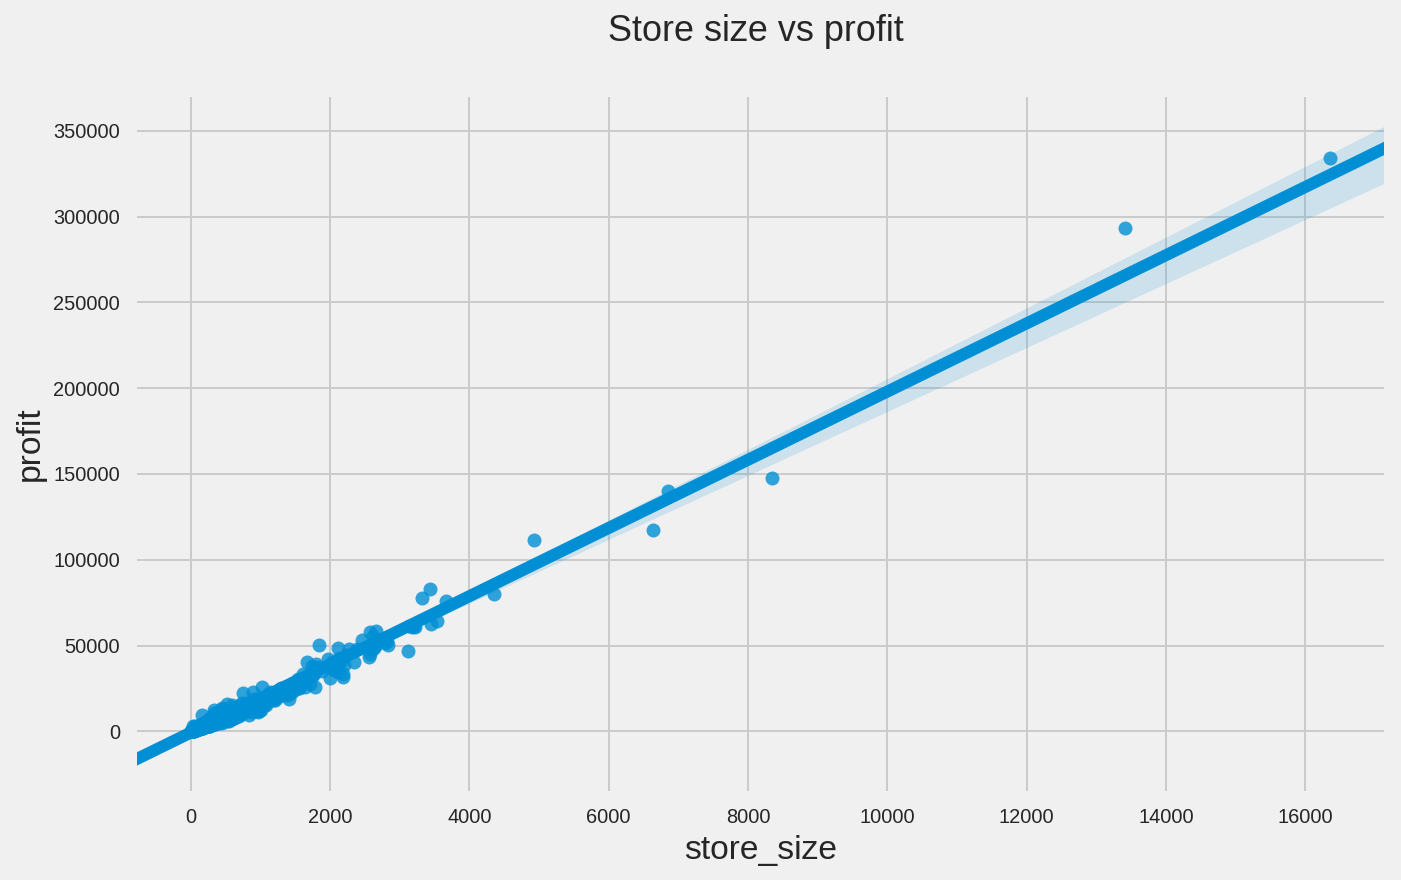

In [40]:
fig = plt.figure(figsize=(10,6))
sns.regplot(store_size['store_size'], store_size['profit'], data=store_size)
#plt.xlim(0,4000)
#plt.ylim(0,15000)
plt.title('Store size vs profit \n', fontsize=18)
plt.show()

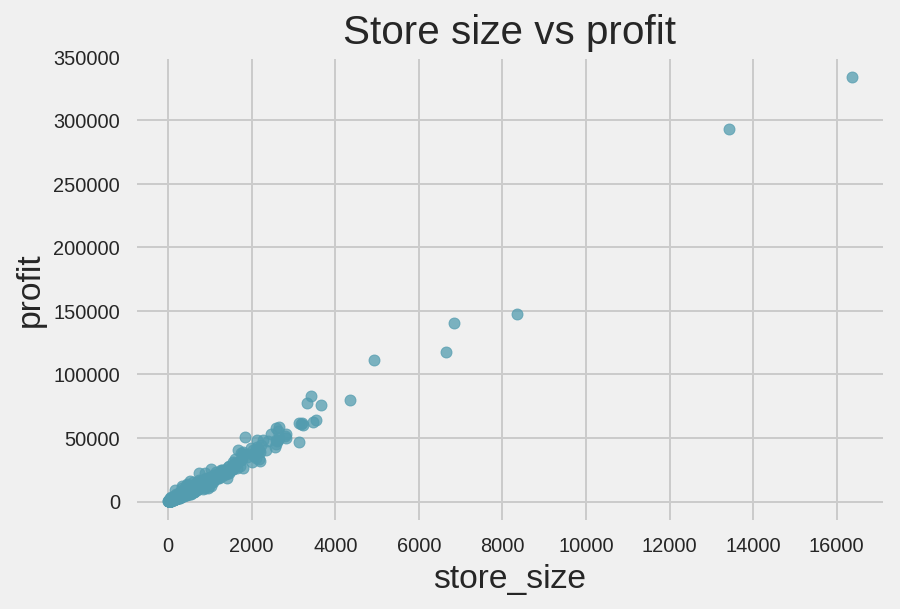

In [41]:
def scatterplot(x_data, y_data, x_label, y_label, title):

# Create the plot object
    _, ax = plt.subplots()

# Plot the data, set the size (s), color and transparency (alpha) of the points
    ax.scatter(x_data, y_data, s = 30, color = '#539caf', alpha = 0.75)

# Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# Call the function to create plot
scatterplot(x_data = store_size['store_size']
            , y_data = store_size['profit']
            , x_label = 'store_size'
            , y_label = 'profit'
            , title = 'Store size vs profit')
# plt.xlim(0,4000)
# plt.ylim(0,15000)
plt.show()
# Whithout disregarding outliers, we can see that there is a consistent relationship between store size and profit
# When disregarding outliers, there seem to be more of a decreaing relationship

### 5.5 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [42]:
iowa_data_q_masked['broadcategory'] = iowa_data_q_masked['Category'].astype(str).str[2]
iowa_data_q_masked.loc[iowa_data_q_masked.broadcategory == '1' , 'broadcategory'] = 'whisky'
iowa_data_q_masked.loc[iowa_data_q_masked.broadcategory == '2' , 'broadcategory'] = 'tequila'
iowa_data_q_masked.loc[iowa_data_q_masked.broadcategory == '3' , 'broadcategory'] = 'vodka'
iowa_data_q_masked.loc[iowa_data_q_masked.broadcategory == '4' , 'broadcategory'] = 'gin'
iowa_data_q_masked.loc[iowa_data_q_masked.broadcategory == '5' , 'broadcategory'] = 'brandy'
iowa_data_q_masked.loc[iowa_data_q_masked.broadcategory == '6' , 'broadcategory'] = 'rum'
iowa_data_q_masked.loc[iowa_data_q_masked.broadcategory == '7' , 'broadcategory'] = 'cocktails'
iowa_data_q_masked.loc[iowa_data_q_masked.broadcategory == '8' , 'broadcategory'] = 'liqueurs'
iowa_data_q_masked.loc[iowa_data_q_masked.broadcategory == '9' , 'broadcategory'] = 'moonshine'
iowa_data_q_masked.head(8)
# Creating broader categories, will not focus to much on moonshine, beer, egg nog etc in this anlysis

/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/dsi-student/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,level_0,index,Date,store_number,City,Zip Code,county_number,County,Category,category_name,...,quarter,sales_q1_2015,sales_q2_2015,sales_q3_2015,sales_q4_2015,sales_q1_2016,2015sales,cost,profit,broadcategory
0,0,0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,...,4,1583.13,2168.16,2456.26,2815.31,2510.46,9022.86,54.00,27.00,brandy
1,1,1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,...,1,32260.12,43463.45,27085.47,39866.25,39097.17,142675.29,27.50,13.76,whisky
2,2,2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,...,1,39287.29,31173.46,38324.77,37540.70,30523.75,146326.22,302.16,151.20,whisky
3,3,3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,...,1,31412.95,34085.38,30449.92,48885.41,29980.54,144833.66,57.00,28.50,cocktails
4,4,4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,...,3,2312.42,3025.24,2016.90,2124.74,2394.38,9479.30,86.40,43.20,vodka
5,5,5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,...,2,10685.78,13219.66,9886.16,14883.55,12818.44,48675.15,79.92,39.96,gin
6,6,6,2015-08-05,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,...,3,5262.24,4765.18,5924.36,14255.90,2871.11,30207.68,19.98,9.99,brandy
7,7,7,2015-06-25,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,...,2,11752.30,20216.30,22806.64,14414.12,11640.67,69189.36,31.50,15.76,whisky


### 5.6 Do relationships exist between the broader liquor type and profit?

In [43]:
func_tuples = [('profit', np.mean),('Std', np.std)]
type_profit=iowa_data_q_masked[iowa_data_q_masked['year']==2015].groupby(['broadcategory'])['profit'].agg(func_tuples).reset_index()
mask=type_profit['broadcategory']!='0' 
type_profit= type_profit[mask]
mask=type_profit['broadcategory']!='n' 
type_profit= type_profit[mask]
mask=type_profit['broadcategory']!='moonshine' 
type_profit= type_profit[mask]
type_profit.sort('profit', ascending=False)
# By looking at then mean profit, tequila is the most profitable type of liquor, followed closely by whisky and rum
# The least profitable are coctails, gin and brandy

/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,broadcategory,profit,Std
8,tequila,54.453897,127.455838
10,whisky,51.165841,171.449795
7,rum,48.117401,148.000314
9,vodka,40.937300,117.542944
4,liqueurs,39.559041,91.337491
1,brandy,32.504296,51.566615
3,gin,31.585720,66.793649
2,cocktails,27.428977,67.937562


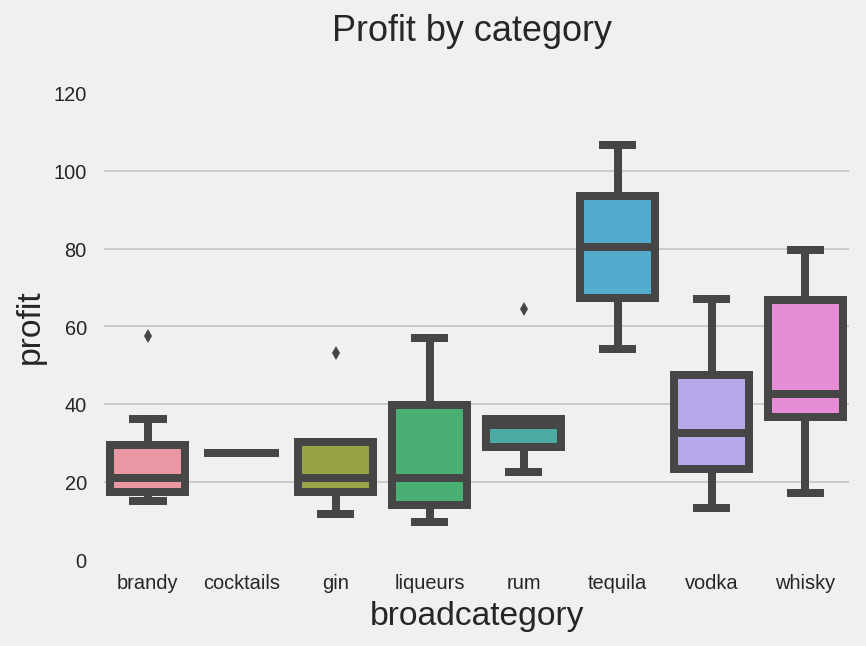

In [44]:
func_tuples = [('profit', np.mean),('Std', np.std)]
type_profit=iowa_data_q_masked[iowa_data_q_masked['year']==2015].groupby(['broadcategory', 'Category'])['profit'].agg(func_tuples).reset_index()
mask=type_profit['broadcategory']!='0' 
type_profit= type_profit[mask]
mask=type_profit['broadcategory']!='n' 
type_profit= type_profit[mask]
mask=type_profit['broadcategory']!='moonshine' 
type_profit= type_profit[mask]
sns.boxplot(x="broadcategory", y="profit",data=type_profit)
plt.ylim(0,120)
plt.title('Profit by category \n', fontsize=18)
# I see the same when using a boxplot 
# I exclude less interesting categories

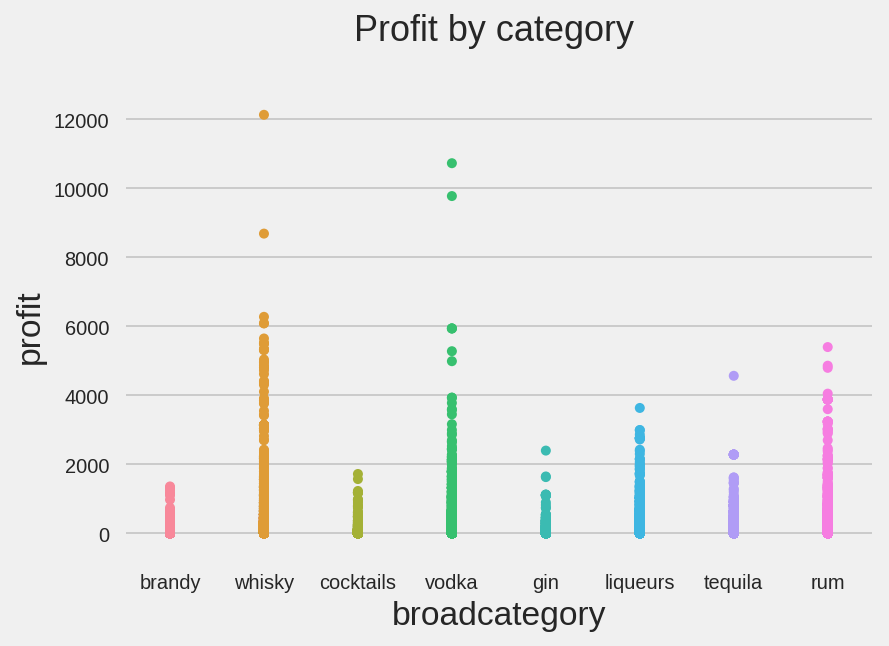

In [45]:
mask=iowa_data_q_masked['broadcategory']!='0' 
iowa_data_q_masked= iowa_data_q_masked[mask]
mask=iowa_data_q_masked['broadcategory']!='n' 
iowa_data_q_masked= iowa_data_q_masked[mask]
mask=iowa_data_q_masked['broadcategory']!='moonshine' 
iowa_data_q_masked=iowa_data_q_masked[mask]
sns.stripplot(x="broadcategory", y="profit", data=iowa_data_q_masked)
plt.title('Profit by category \n', fontsize=18)
plt.show()
# same story


### 5.7 Are there any noticeable relationships between liquor brand and sales? Profit?

In [46]:
sales_mean_brand = iowa_data_q_masked.groupby(['item_description']).mean()[['sale_dollars']].reset_index()
sales_mean_brand.sort('sale_dollars', ascending=0, inplace=False).head()
# Cedar Ridge Single Malt Single Barrel Select has by far the highest mean sales

/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,item_description,sale_dollars
437,Cedar Ridge Single Malt Single Barrel Select,14602.50
1229,Member's Mark Vodka,4896.00
1228,Member's Mark Spiced Rum,3913.92
1227,Medea Vodka,3221.64
61,Absolut w/Ginger Beer,2399.20


In [47]:
profit_mean_brand = iowa_data_q_masked.groupby(['item_description']).mean()[['profit']].reset_index()
profit_mean_brand.sort('profit', ascending=0, inplace=False).head()
# The same is true for mean profit

/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,item_description,profit
437,Cedar Ridge Single Malt Single Barrel Select,4867.50
1229,Member's Mark Vodka,1632.00
1228,Member's Mark Spiced Rum,1304.64
1227,Medea Vodka,1073.88
61,Absolut w/Ginger Beer,800.00


### 5.8 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [48]:
profit_sum_brand = iowa_data_q_masked.groupby(['item_description']).sum()[['profit', 'volume_sold_gallons']].reset_index()
profit_sum_brand.rename(columns= {'volume_sold_gallons':'store_size'}, inplace=True)
profit_sum_brand.sort('profit', ascending=0, inplace=False).head()

# We want to tax items selled in large stores, where they are making large profits
# Here is the list of the 5 items with the highest profit

/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,item_description,profit,store_size
248,Black Velvet,511244.09,43071.70
976,Jack Daniels Old #7 Black Lbl,386518.46,11118.36
405,Captain Morgan Spiced Rum,378973.68,17601.03
746,Fireball Cinnamon Whiskey,292047.53,14317.43
528,Crown Royal Canadian Whisky,256381.62,7254.55


In [49]:
profit_sum_brand.sort('store_size', ascending=0, inplace=False).head()
# Here are the items sorted by store size

/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,item_description,profit,store_size
248,Black Velvet,511244.09,43071.70
885,Hawkeye Vodka,227049.59,28321.35
405,Captain Morgan Spiced Rum,378973.68,17601.03
762,Five O'clock Vodka,120845.94,14737.96
207,Barton Vodka,110831.10,14666.58


In [50]:
# There are items that share the top on largest store size per item and profit per item
# I would therefore recommend to put a tax on Black Velvet, Captain Morgan Spiced Rum and Hawkeye Vodka
# This will affect the larger stores, which have greater profits
# The tax will therefore affect the larger stores more without targeting them directly
# THe liqor board could add additional items if necessary 


## 6. Case 2 = Market research for new store locations 

A liquor store owner in Iowa is looking to open a store in a new location and has hired you as a consultant to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [51]:
iowa_data_q_masked.head(6) 
# Coumns already created for 4 (sales_q1_2015 and sales_q1_2016)

,level_0,index,Date,store_number,City,Zip Code,county_number,County,Category,category_name,...,quarter,sales_q1_2015,sales_q2_2015,sales_q3_2015,sales_q4_2015,sales_q1_2016,2015sales,cost,profit,broadcategory
0,0,0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,...,4,1583.13,2168.16,2456.26,2815.31,2510.46,9022.86,54.00,27.00,brandy
1,1,1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,...,1,32260.12,43463.45,27085.47,39866.25,39097.17,142675.29,27.50,13.76,whisky
2,2,2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,...,1,39287.29,31173.46,38324.77,37540.70,30523.75,146326.22,302.16,151.20,whisky
3,3,3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,...,1,31412.95,34085.38,30449.92,48885.41,29980.54,144833.66,57.00,28.50,cocktails
4,4,4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,...,3,2312.42,3025.24,2016.90,2124.74,2394.38,9479.30,86.40,43.20,vodka
5,5,5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,...,2,10685.78,13219.66,9886.16,14883.55,12818.44,48675.15,79.92,39.96,gin


### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [52]:
growth_q12015_q12016= (iowa_data_q_masked.sales_q1_2016-iowa_data_q_masked.sales_q1_2015)/iowa_data_q_masked.sales_q1_2015

# Calculating the growth rate between the first quarter 2015 and the first quarter 2016
# Growth rate = (sales in first quarter 2016-sales in first quarter 2015)/sales in first quarter 2015

In [53]:
print growth_q12015_q12016.shape            
print iowa_data_q_masked.shape

# Checking for right shape

(256437,)
(256437, 31)


In [54]:
iowa_data_q_masked['q1growth']= growth_q12015_q12016
iowa_data_q_masked.head(6)

# Adding the new variable into the dataset and checking the table afterwards

,level_0,index,Date,store_number,City,Zip Code,county_number,County,Category,category_name,...,sales_q1_2015,sales_q2_2015,sales_q3_2015,sales_q4_2015,sales_q1_2016,2015sales,cost,profit,broadcategory,q1growth
0,0,0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,...,1583.13,2168.16,2456.26,2815.31,2510.46,9022.86,54.00,27.00,brandy,0.585757
1,1,1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,...,32260.12,43463.45,27085.47,39866.25,39097.17,142675.29,27.50,13.76,whisky,0.211935
2,2,2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,...,39287.29,31173.46,38324.77,37540.70,30523.75,146326.22,302.16,151.20,whisky,-0.223063
3,3,3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,...,31412.95,34085.38,30449.92,48885.41,29980.54,144833.66,57.00,28.50,cocktails,-0.045599
4,4,4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,...,2312.42,3025.24,2016.90,2124.74,2394.38,9479.30,86.40,43.20,vodka,0.035443
5,5,5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,...,10685.78,13219.66,9886.16,14883.55,12818.44,48675.15,79.92,39.96,gin,0.199579


In [55]:
growth_sales_by_county = iowa_data_q_masked.groupby(['County'])['q1growth'].agg([np.mean]).reset_index()
growth_sales_by_county.sort('mean').tail(5)

# Sorting by the mean to look at the largest growth rate within a county in Iowa
# We can see that Decatur has the largest growth rate

/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,County,mean
32,Fayette,0.994318
11,Butler,1.031174
23,Crawford,1.035488
2,Allamakee,1.086797
26,Decatur,3.005838


In [56]:
growth_sales_by_county.sort('mean').head(5)

# THese are the counties with negative growth rates, and therefore areas we would like to avoid investing in

/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,County,mean
44,Howard,-0.655077
4,Audubon,-0.560003
18,Chickasaw,-0.428760
82,Shelby,-0.351515
13,Carroll,-0.337970


### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

In [57]:
# I would recommend a county with high mean growth between q1 2015 and q1 2016
# From 6.2, we can see that Decateur had the highest mean growth rate
# Other counties from the table can be considered as well
# I would recommend to avoid any of the counties with negative mean growth in sales

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [58]:
profit_mean_max = iowa_data_q_masked.groupby(['broadcategory']).mean()[['profit', 'volume_sold_gallons']].reset_index()
mask=profit_mean_max['broadcategory']!='0' 
profit_mean_max= profit_mean_max[mask]
mask=profit_mean_max['broadcategory']!='n' 
profit_mean_max= profit_mean_max[mask]
mask=profit_mean_max['broadcategory']!='moonshine' 
profit_mean_max= profit_mean_max[mask]
profit_mean_max.sort('profit', ascending=0, inplace=False).head()
# As seen in previous sections, the most profitable type of liquor overall to maximize profit is tequilla
# Closely followed by whisky and rum

/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,broadcategory,profit,volume_sold_gallons
5,tequila,53.061774,2.074252
7,whisky,50.413340,2.432170
4,rum,47.163303,2.687363
6,vodka,40.623243,2.823048
3,liqueurs,39.470218,1.938171


In [59]:
profit_mean_max = iowa_data_q_masked.groupby(['broadcategory','County']).mean()[['profit', 'volume_sold_gallons']].reset_index()
mask=profit_mean_max['broadcategory']!='0' 
profit_mean_max= profit_mean_max[mask]
mask=profit_mean_max['broadcategory']!='n' 
profit_mean_max= profit_mean_max[mask]
mask=profit_mean_max['broadcategory']!='moonshine' 
profit_mean_max= profit_mean_max[mask]
profit_mean_max.sort('profit', ascending=0, inplace=False).head()
# If we look at specific counties, it's the most profitable to sell whisky in Dallas county
# See below the 5 most profitable type of liquor in different counties

/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,broadcategory,County,profit,volume_sold_gallons
709,whisky,Dallas,120.469986,4.691994
177,cocktails,Shelby,93.709286,10.485000
698,whisky,Carroll,87.641228,5.056583
393,rum,Audubon,79.500000,4.060000
708,whisky,Crawford,78.896304,5.500466


In [60]:
profit_mean_item = iowa_data_q_masked.groupby(['item_description','County']).mean()[['profit', 'volume_sold_gallons']].reset_index()
profit_mean_item.sort('profit', ascending=0, inplace=False).head()
# For a specific liquor item, we can see that the counties changes
# The most profitables is selling Cedar Ridge Single Malt Single Barrel Select in Johnson county selling 70 gallons

/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,item_description,County,profit,volume_sold_gallons
8863,Cedar Ridge Single Malt Single Barrel Select,Johnson,4867.50,70.14
25945,Medea Vodka,Johnson,3165.12,66.57
8112,Captain Morgan Spiced Barrel,Lee,2700.00,138.69
25951,Member's Mark Vodka,Linn,2448.00,266.29
6897,Canadian Mist Canadian Why Pet,Montgomery,1575.00,138.69
